In [1]:
# import numpy library as np
import numpy as np

# numerical data file
#filename="mnist_train.csv"

# load the data with NumPy function loadtxt
#data = np.loadtxt(filename, delimiter=",")

#data[1]

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


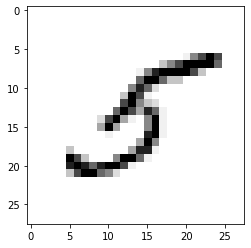

In [4]:
img = x_train[35]
plt.imshow(img, cmap="Greys")
plt.show()

In [5]:
X_train = np.reshape(x_train,(60000,28*28))

In [6]:
#def theta_fit(X_train,y_train,k,sigma,lamb):
#    index=np.where(y_train==k)
#    index=index[0][0:50]
#    P=[]
#    for i in range(X_train.shape[0]):
#        for j in range(X_train[index].shape[0]):
#            P.append(np.exp(-sigma*(np.linalg.norm(X_train[i]-X_train[index][j]))**2))

#    Phi=np.array(P).reshape(X_train.shape[0],X_train[index].shape[0])
#    Pi=np.zeros(X_train.shape[0]).reshape(X_train.shape[0],1)
#    Pi[index]=1
#    Phinv=np.linalg.inv(np.dot(Phi.T,Phi)+(lamb*np.eye(X_train[index].shape[0])))
#    pi=np.dot(Phi.T,Pi)
#    theta=np.dot(Phinv,pi)
#    return theta

In [13]:
S=np.array([X_train[y_train==i].mean(axis=0) for i in range(10)])

In [104]:
from scipy.spatial import distance_matrix

In [115]:
def theta_fit(X_train,y_train,k,sigma,lamb):
    index=np.where(y_train==k)
    S=np.array([X_train[index].mean(axis=0)])    
    Phi=np.exp(-sigma*(distance_matrix(X_train,S)**2))

    Pi=np.zeros(X_train.shape[0]).reshape(X_train.shape[0],1)
    Pi[index]=1
    Phinv=np.linalg.inv(np.dot(Phi.T,Phi)+(lamb*np.eye(1)))
    pi=np.dot(Phi.T,Pi)
    theta=np.dot(Phinv,pi)
    return theta

In [26]:
y_train.shape
#np.exp(-sigma*(np.linalg.norm(X_train[i]-X_train[index]))**2)

(60000,)

In [27]:
X_train.shape

(60000, 784)

In [116]:
theta0=theta_fit(X_train,y_train,0,0.05,0.1)

In [117]:
theta0

array([[5.30055111]])

In [118]:
theta1=theta_fit(X_train,y_train,1,0.05,0.1)

In [119]:
theta2=theta_fit(X_train,y_train,2,0.05,0.1)

In [120]:
theta3=theta_fit(X_train,y_train,3,0.05,0.1)
theta4=theta_fit(X_train,y_train,4,0.05,0.1)

In [121]:
theta5=theta_fit(X_train,y_train,5,0.05,0.1)

In [122]:
theta6=theta_fit(X_train,y_train,6,0.05,0.1)
theta7=theta_fit(X_train,y_train,7,0.05,0.1)
theta8=theta_fit(X_train,y_train,8,0.05,0.1)
theta9=theta_fit(X_train,y_train,9,0.05,0.1)

In [123]:
theta=np.array([theta0,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9])

In [161]:
def include(X_train,y_train,n,X_test,i0,theta):
    
    index=np.where(y_train==n)
    S=np.array([X_train[index].mean(axis=0)])
    Pht=np.exp(-0.05*(distance_matrix(X_test[i0].reshape(1,784),S)**2))
    return max(0,np.dot(theta.T,Pht))

In [147]:
S=np.array([X_train[y_train==0].mean(axis=0)])
type(S)
S.shape
X_test[0].shape

(784,)

In [162]:
def LS_pred_digit(X_train,X_test,y_train,theta,i0):
    P=[]
    for i in range(10):
        P.append(include(X_train,y_train,i,X_test,i0,theta[i]))
    P=np.array(P)
    tol=sum(P)
    return np.argmax(P/tol)

In [163]:
X_test = np.reshape(x_test,(10000,28*28))

1

<Figure size 432x288 with 0 Axes>

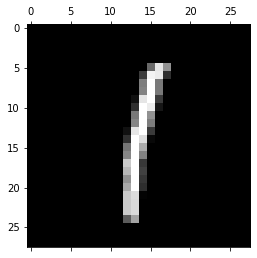

In [166]:
i0=np.random.randint(low=1,high=len(X_test),size=1)[0]
X_test[i0]
plt.gray()
plt.matshow(X_test[i0].reshape(28,28))
y_test[i0]

In [167]:
LS_pred_digit(X_train,X_test,y_train,theta,i0)

1

In [168]:
A=[]
for i in range(len(y_test[0:50])):
    A.append(LS_pred_digit(X_train,X_test,y_train,theta,i))

In [102]:
from sklearn import  metrics

In [169]:
cm1= metrics.confusion_matrix(y_test[0:50],A)
print("Confusion matrix:\n%s" % cm1)

Confusion matrix:
[[5 0 0 0 0 0 0 0 0]
 [0 8 0 1 0 0 0 0 0]
 [0 1 2 1 0 0 1 0 0]
 [0 0 0 4 0 0 0 0 0]
 [1 0 0 0 8 0 0 0 0]
 [1 0 0 2 0 1 0 0 0]
 [1 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 6 0]
 [0 0 0 0 1 0 0 2 2]]


In [174]:
ID=np.random.randint(low=1,high=len(X_test),size=10)
Num1=0
for i in range(len(ID)):
    A=LS_pred_digit(X_train,X_test,y_train,theta,ID[i])
    if (A-y_test[ID[i]])==0:
        Num1=Num1+1
    print (A,y_test[ID[i]])

1 1
2 2
1 1
4 4
6 4
6 6
8 8
7 7
0 0
1 1


In [175]:
Num1/len(ID)

0.9

In [43]:
len(ID)

200

0.009850236631083245

<Figure size 432x288 with 0 Axes>

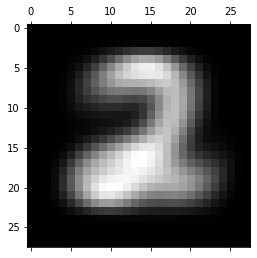

In [630]:
index2=np.where(y_train==2)
X2=X_train[index2]
X2_bar=sum(X2)/(X2.shape[0])

plt.gray()
plt.matshow(X2_bar.reshape(28,28))


z2=(np.linalg.norm(X2-X2_bar))**2/len(index2[0])

0.5*(1/(z2))

In [764]:
def sigma(X_train,y_train):
    S=[]
    for k in range(10):
        index=np.where(y_train==k)
        X=X_train[index]
        X_bar=sum(X)/(X.shape[0])
        z=(np.linalg.norm(X-X_bar))**2/len(index[0])
        S.append(0.5*(1/(z)))
    S=np.array(S)
    return S

In [765]:
S=sigma(X_train,y_train)

In [766]:
S

array([0.01001625, 0.02224633, 0.00985024, 0.01112487, 0.01223322,
       0.01050839, 0.01160317, 0.01334375, 0.01096594, 0.01296379])

In [44]:
X_train.shape

(60000, 784)

In [60]:
S=np.array([X_train[y_train==i].mean(axis=0) for i in range(10)])

In [61]:
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
from scipy.spatial import distance_matrix

In [72]:
P= distance_matrix(X_test, S)

In [73]:
P.shape

(10000, 10)

In [78]:
(P[y_test==3].argmin(axis=1)==y_test[y_test==3]).mean()

0.805940594059406